In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df=df.drop(["id"],axis=1)

In [5]:
df["diagnosis"]=df["diagnosis"].replace({'M','B'},{0,1})

<ipython-input-5-32dab06a3b5f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"]=df["diagnosis"].replace({'M','B'},{0,1})


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [8]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
scaler=MinMaxScaler()
x_tr[x_tr.columns]=scaler.fit_transform(x_tr)
x_tr=pd.DataFrame(x_tr)
x_ts[x_ts.columns]=scaler.fit_transform(x_ts)
x_ts=pd.DataFrame(x_ts)

In [10]:
import tensorflow as tf
from tensorflow import keras

In [15]:
input_shape = x_tr.shape[1]
model=keras.Sequential()
model.add(keras.Input(shape=(input_shape,)))
model.add(keras.layers.Dense(20 ,activation="relu"))
model.add(keras.layers.Dense(15,activation="relu"))
model.add(keras.layers.Dense(2,activation="sigmoid"))

In [16]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [18]:
hstry=model.fit(x_tr,y_tr,validation_split=0.1,epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 9ms/step - loss: 0.2676 - accuracy: 0.9193 - val_loss: 0.2965 - val_accuracy: 0.8261
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.9218 - val_loss: 0.2818 - val_accuracy: 0.8261
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9169 - val_loss: 0.2693 - val_accuracy: 0.8261
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9291 - val_loss: 0.2564 - val_accuracy: 0.8261
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 0.9315 - val_loss: 0.2444 - val_accuracy: 0.8478
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1932 - accuracy: 0.9267 - val_loss: 0.2303 - val_accuracy: 0.8261
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.9340 - val_loss: 0.2210 - val_accuracy: 0.8478
Epoch 8/20
13/13 [==

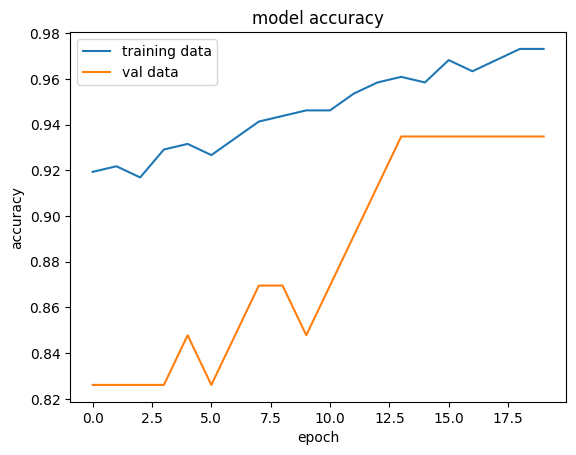

In [20]:
plt.plot(hstry.history['accuracy'])
plt.plot(hstry.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','val data'])

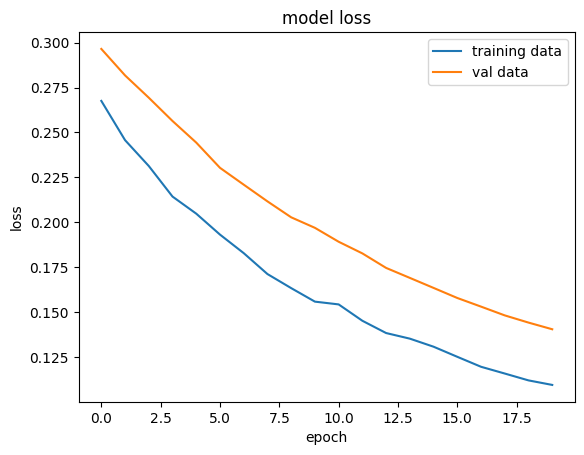

In [21]:
plt.plot(hstry.history['loss'])
plt.plot(hstry.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data','val data'])

In [22]:
loss ,accuracy=model.evaluate(x_tr,y_tr)

15/15 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9692


In [44]:
y_pred=model.predict(x_ts)

4/4 [==============================] - 0s 2ms/step


In [43]:
x_ts.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,0.300949,0.379584,0.292068,0.195099,0.455827,0.226648,0.213239,0.207100,0.468581,0.371851,...,0.286645,0.350447,0.278990,0.151749,0.405691,0.182302,0.241719,0.354029,0.373774,0.191647
70,0.655683,0.513875,0.624931,0.568752,0.316914,0.217287,0.287693,0.430949,0.282774,0.065502,...,0.689332,0.406403,0.705972,0.517679,0.232598,0.178115,0.243167,0.623997,0.254259,0.046076
131,0.464883,0.423191,0.453449,0.349034,0.594595,0.279904,0.390517,0.438320,0.471831,0.178032,...,0.461319,0.389674,0.455346,0.299002,0.494837,0.183897,0.343077,0.528078,0.328085,0.142405
431,0.297111,0.333994,0.295043,0.186970,0.539378,0.309922,0.206207,0.151707,0.406826,0.616728,...,0.201547,0.300548,0.239623,0.101823,0.423520,0.207326,0.217466,0.257063,0.255550,0.232671
540,0.249959,0.173439,0.241641,0.149553,0.458588,0.246659,0.179462,0.140596,0.410618,0.509237,...,0.176303,0.207384,0.173421,0.083960,0.345517,0.156381,0.162624,0.241298,0.196954,0.150152


In [45]:
print(y_pred)

[[2.24764958e-01 1.85998961e-01]
 [6.27070316e-04 6.62508011e-01]
 [3.68967024e-03 6.19528115e-01]
 [9.24149334e-01 1.96271315e-02]
 [9.58498418e-01 1.53426547e-02]
 [3.90127707e-06 8.01822364e-01]
 [1.27509538e-05 7.66426325e-01]
 [1.13896048e-02 4.72342819e-01]
 [2.07966015e-01 1.46464393e-01]
 [5.83270967e-01 1.89281330e-01]
 [4.56510425e-01 1.53395236e-01]
 [6.44885423e-03 5.83652914e-01]
 [5.22445261e-01 1.77368879e-01]
 [5.44744097e-02 1.75075114e-01]
 [6.81981921e-01 1.59771204e-01]
 [6.76862954e-04 4.93403733e-01]
 [6.91339910e-01 1.33171991e-01]
 [9.60837841e-01 2.04504654e-02]
 [9.72888529e-01 1.14964927e-02]
 [1.37575378e-04 7.07817018e-01]
 [1.93901524e-01 2.14849442e-01]
 [5.99032044e-01 1.05343983e-01]
 [2.65127601e-05 7.56656647e-01]
 [8.96211684e-01 5.96777610e-02]
 [7.37507105e-01 8.76121446e-02]
 [7.70440459e-01 5.77373989e-02]
 [6.22921407e-01 1.44743890e-01]
 [8.94099534e-01 2.50260402e-02]
 [7.11102605e-01 9.50623900e-02]
 [4.62311116e-04 6.54565036e-01]
 [7.512307

In [46]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [48]:
print(y_pred_label)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]


In [55]:
input_data=(20.29, 14.34, 135.1, 1297, 0.1003, 0.1328, 0.198, 0.1043, 0.1809, 0.05883, 0.7572, 0.7813, 5.438, 94.44, 0.01149, 0.02461, 0.05688, 0.01885, 0.01756, 0.005115, 22.54, 16.67, 152.2, 1575, 0.1374, 0.205, 0.4, 0.1625, 0.2364, 0.07678)
in_data_as_np_arr = np.asarray(input_data)
in_data_reshaped = in_data_as_np_arr.reshape(1, -1)
input_data_std = scaler.transform(in_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
if(np.argmax(prediction)==0):
    print("m")
else:
  print("b")

1/1 [==============================] - 0s 24ms/step
[[0.00184588 0.5613545 ]]
b


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
